Advance Python - 23rd July - Module 9

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import math

In [2]:
housing = fetch_california_housing()
print(type(housing))
print(housing.target)

<class 'sklearn.utils._bunch.Bunch'>
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [3]:
data = housing.data[:,0:2]

In [4]:
target =housing.target

In [5]:
df = pd.DataFrame(data, columns=["Feature0","Feature1"])
df["target"] = target
print(df.shape)
df.head()

(20640, 3)


,Feature0,Feature1,target
0,8.3252,41.0,4.526
1,8.3014,21.0,3.585
2,7.2574,52.0,3.521
3,5.6431,52.0,3.413
4,3.8462,52.0,3.422


In [6]:
import matplotlib.pyplot as plt


<Axes: xlabel='Feature0', ylabel='Feature1'>

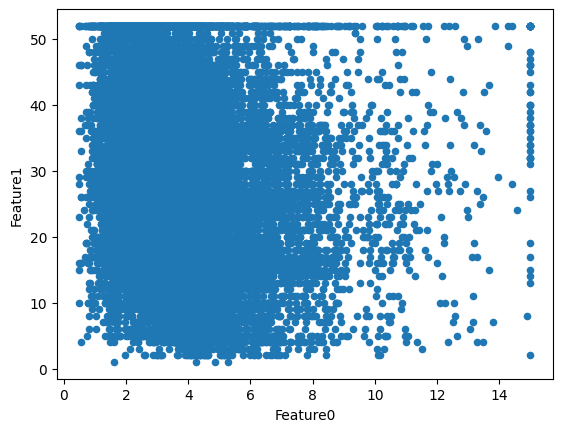

In [7]:
df.plot(kind="scatter",x="Feature0",y="Feature1")

<Axes: >

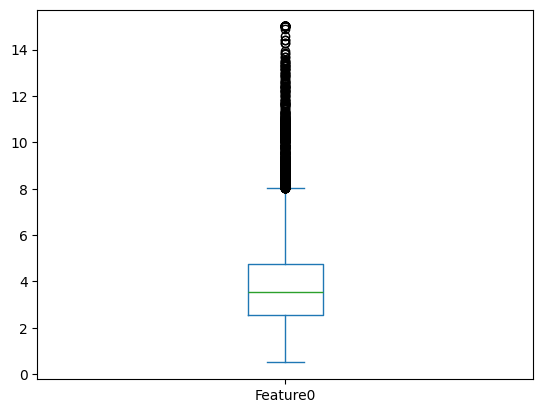

In [8]:
df["Feature0"].plot(kind="box")

<Axes: >

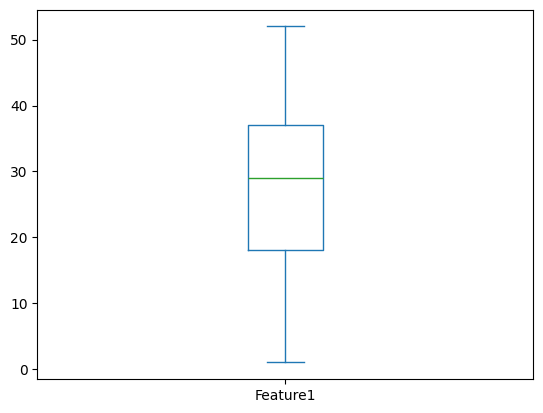

In [9]:
df["Feature1"].plot(kind="box")

In [10]:
df.corr("pearson")

,Feature0,Feature1,target
Feature0,1.000000,-0.119034,0.688075
Feature1,-0.119034,1.000000,0.105623
target,0.688075,0.105623,1.000000


<Axes: xlabel='Feature0', ylabel='target'>

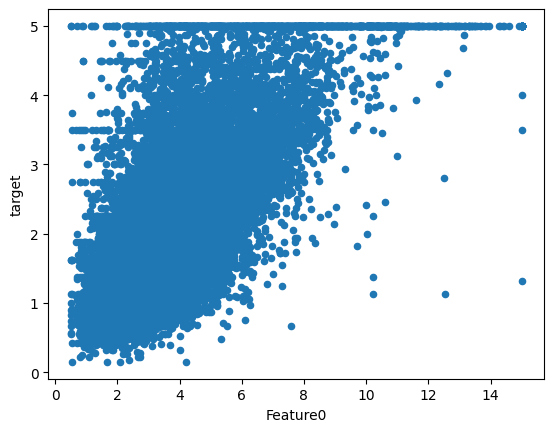

In [11]:
df.plot(kind="scatter",x="Feature0",y="target")

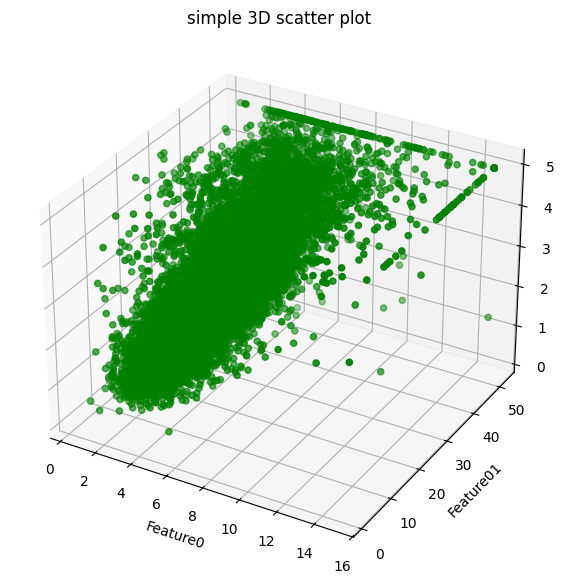

In [12]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(df["Feature0"], df["Feature1"], df["target"], color = "green")
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature01")
ax.set_zlabel("target")
plt.title("simple 3D scatter plot")

plt.show()

In [13]:
X = df[["Feature0","Feature1"]]
y = df["target"]
print("X shape:", X.shape)
print("y shape:",y.shape)

X shape: (20640, 2)
y shape: (20640,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)
# you can use the below code to split the data into train and test
#X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.3,random_state=42)

print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: (14448, 2)
X_test.shape: (6192, 2)
y_train.shape: (14448,)
y_test.shape: (6192,)


Simple Linear regression

In [15]:
regression = LinearRegression()
model = regression.fit(X_train,y_train)
# We can use .predict() method to use the model for predicting new observations
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2 Score train and test

In [18]:
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.5093
r2_test :  0.5087


RMSE

In [17]:
RMSE_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE_train : ', RMSE_train)
RMSE_test = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE_test : ', RMSE_test)

RMSE_train :  0.8108139243661333
RMSE_test :  0.8029929600186397


In [19]:
model.intercept_

-0.10299578449607072

In [20]:
model.coef_

array([0.43176259, 0.01743944])

## Interaction features (having both X1 and X2)

In [21]:
interaction = PolynomialFeatures(degree=3, include_bias= False, interaction_only=True)
features_interaction = interaction.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(features_interaction,y,test_size=0.3,random_state=42)

print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: (14448, 3)
X_test.shape: (6192, 3)
y_train.shape: (14448,)
y_test.shape: (6192,)


In [22]:
X_train[1:4]

array([[  2.8631,  20.    ,  57.262 ],
       [  4.2026,  24.    , 100.8624],
       [  3.1094,  14.    ,  43.5316]])

In [23]:
# Linear Regression and r2 score
regression = LinearRegression()
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.5098
r2_test :  0.5095


## Polynomial features (having both as well as individual X1 and X2)

In [24]:
polynomial = PolynomialFeatures(degree=3,include_bias=False)
features_polynomial = polynomial.fit_transform(X)
features_polynomial[0]

array([8.32520000e+00, 4.10000000e+01, 6.93089550e+01, 3.41333200e+02,
       1.68100000e+03, 5.77010912e+02, 2.84166716e+03, 1.39946612e+04,
       6.89210000e+04])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features_polynomial,y,test_size=0.3,random_state=42)

print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: (14448, 9)
X_test.shape: (6192, 9)
y_train.shape: (14448,)
y_test.shape: (6192,)


In [27]:
X_train[1:4]

array([[2.86310000e+00, 2.00000000e+01, 8.19734161e+00, 5.72620000e+01,
        4.00000000e+02, 2.34698088e+01, 1.63946832e+02, 1.14524000e+03,
        8.00000000e+03],
       [4.20260000e+00, 2.40000000e+01, 1.76618468e+01, 1.00862400e+02,
        5.76000000e+02, 7.42256772e+01, 4.23884322e+02, 2.42069760e+03,
        1.38240000e+04],
       [3.10940000e+00, 1.40000000e+01, 9.66836836e+00, 4.35316000e+01,
        1.96000000e+02, 3.00628246e+01, 1.35357157e+02, 6.09442400e+02,
        2.74400000e+03]])

In [26]:
# Linear Regression and r2 score
regression = LinearRegression()
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.54
r2_test :  0.5359


In [49]:
polynomial = PolynomialFeatures(degree=10,include_bias=False)
features_polynomial = polynomial.fit_transform(X)
features_polynomial[0]

array([8.32520000e+00, 4.10000000e+01, 6.93089550e+01, 3.41333200e+02,
       1.68100000e+03, 5.77010912e+02, 2.84166716e+03, 1.39946612e+04,
       6.89210000e+04, 4.80373125e+03, 2.36574474e+04, 1.16508353e+05,
       5.73781109e+05, 2.82576100e+06, 3.99920234e+04, 1.96952981e+05,
       9.69955344e+05, 4.77684249e+06, 2.35250255e+07, 1.15856201e+08,
       3.32941593e+05, 1.63967296e+06, 8.07507223e+06, 3.97681691e+07,
       1.95850542e+08, 9.64526045e+08, 4.75010424e+09, 2.77180535e+06,
       1.36506053e+07, 6.72265913e+07, 3.31077961e+08, 1.63049493e+09,
       8.02987223e+09, 3.95455678e+10, 1.94754274e+11, 2.30758339e+07,
       1.13644019e+08, 5.59674818e+08, 2.75629024e+09, 1.35741964e+10,
       6.68502923e+10, 3.29224761e+11, 1.62136828e+12, 7.98492523e+12,
       1.92110932e+08, 9.46109190e+08, 4.65940480e+09, 2.29466675e+10,
       1.13007900e+11, 5.56542053e+11, 2.74086198e+12, 1.34982152e+13,
       6.64760995e+13, 3.27381934e+14, 1.59936193e+09, 7.87654823e+09,
      

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features_polynomial,y,test_size=0.3,random_state=42)

print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: (14448, 65)
X_test.shape: (6192, 65)
y_train.shape: (14448,)
y_test.shape: (6192,)


In [51]:
# Linear Regression and r2 score
regression = LinearRegression()
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.333
r2_test :  -0.6744


## Regularization

In [59]:
feature = housing.data[:,:]
target =housing.target
df = pd.DataFrame(feature, columns=["Feature0","Feature1","Feature2","Feature3","Feature4","Feature5","Feature6","Feature7"])

df["target"] = target
X = df.loc[:,df.columns != "target"]
print("X shape:",X.shape)

y=df["target"]
print("y shape:",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

X shape: (20640, 8)
y shape: (20640,)


In [60]:
print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)
print("y_train.shape:",y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: (14448, 8)
X_test.shape: (6192, 8)
y_train.shape: (14448,)
y_test.shape: (6192,)


In [61]:
# Linear Regression and r2 score
regression = LinearRegression()
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.6093
r2_test :  0.5958


## Lasso Regularization (L1)

In [62]:
regression = Lasso(alpha=0.1)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.5461
r2_test :  0.5451


In [63]:
regression = Lasso(alpha=0.05)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.5826
r2_test :  0.5821


In [64]:
regression = Lasso(alpha=0.09)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.5554
r2_test :  0.5544


In [65]:
regression = Lasso(alpha=0.01)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.6052
r2_test :  0.5998


In [70]:
regression = Lasso(alpha=0.009)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.606
r2_test :  0.5999


## Ridge REgularization (L2)

In [71]:
regression = Ridge(alpha=0.5)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.6093
r2_test :  0.5958


In [75]:
regression = Ridge(alpha=0.0000001)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.6093
r2_test :  0.5958


## Elastic Net Regularization

In [77]:
from sklearn.linear_model import ElasticNet

regression = ElasticNet(alpha=1)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.4242
r2_test :  0.4238


In [78]:
regression = ElasticNet(alpha=0.5)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.4872
r2_test :  0.4862


In [80]:
regression = ElasticNet(alpha=0.009)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.6076
r2_test :  0.5998


In [81]:
regression = Lasso(alpha=0.009)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train : ', round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test : ', round(r2_test,4))

r2_train :  0.606
r2_test :  0.5999


In [82]:
df2 = pd.read_csv("house_price_prediction.csv")

In [83]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
